# Classification Comparison

## Content
1. [Import Libraries](#1)
2. [Functions for ML Models](#2)
3. [Read Data and Analysis](#3)
4. [Finding and Applying the Best Parameters for ML Models](#4)
      * K-NN
      * Decision Tree
      * Random Forest
      * MLP Classifier
      * SVM
      * Gaussian Naive Bayes
      * XGBoost
      * Ensemble Learning(Voting)
5. [Accuracy and F1-Score Graph of All Models](#5)  


<a id='1'></a>
### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from sklearn.ensemble import VotingClassifier,StackingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report

import warnings
warnings.filterwarnings('ignore')

<a id='2'></a>
### Functions for ML Models

In [2]:
# To read and inspect the data:
def import_data(data_url):
    df = pd.read_csv(data_url)
    print("10 Random Samples from Dataset: \n", df.sample(10))
    print('Dataset Size:', df.shape)
    print("Number of Null Values in Dataset:", df.isnull().sum().sum())
    print('Dataset Summary: \n', df.info())
    print('Statistical Summary of Dataset:', df.describe())
    return df

# To split the dataset:
def split_dataset(df, label, test_size):
    X = df.drop(columns=label)
    Y = df[label]
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=123)
    print('x_train Shape:', x_train.shape)
    print('x_test Shape:', x_test.shape)
    print('y_train Shape:', y_train.shape)
    print('y_test Shape:', y_test.shape)
    return x_train, x_test, y_train, y_test

# K-NN Algorithm
def knn_algorithm(neighbors, metric, x_train, y_train, x_test):
    knn = KNeighborsClassifier(n_neighbors=neighbors, metric=metric)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    return y_pred, knn

# Decision Tree Algorithm
def dt_algorithm(criterion, max_depth, min_samples_leaf, x_train, y_train, x_test):
    dt = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, min_samples_leaf=min_samples_leaf)
    dt.fit(x_train, y_train)
    y_pred = dt.predict(x_test)
    return y_pred, dt

# Support Vector Machine Algorithm
def svm_algorithm(c, kernel, gamma, x_train, y_train, x_test):
    svm = SVC(kernel=kernel, C=c, gamma=gamma, probability=True)
    svm.fit(x_train, y_train)
    y_pred = svm.predict(x_test)
    return y_pred, svm

# Naive Bayes Algorithm
def nb_algorithm(x_train, y_train, x_test):
    gnb = GaussianNB()
    gnb.fit(x_train, y_train)
    y_pred = gnb.predict(x_test)
    return y_pred, gnb

# Multilayer Perceptron Algorithm
def mlp_algorithm(hidden_layer_size, activation, max_iter, x_train, y_train, x_test):
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_size, max_iter=max_iter, activation=activation)
    mlp.fit(x_train, y_train)
    y_pred = mlp.predict(x_test)
    return y_pred, mlp

# Random Forest Algorithm
def rf_algorithm(n_estimators, criterion, x_train, y_train, x_test):
    rfc = RandomForestClassifier(random_state=0)
    rfc.fit(x_train, y_train)
    y_pred = rfc.predict(x_test)
    return y_pred, rfc

# XGB Boost Algorithm
def xgbc_algorithm(x_train, y_train, x_test):
    xgbc = xgb.XGBClassifier()
    xgbc.fit(x_train, y_train)
    y_pred = xgbc.predict(x_test)
    return y_pred, xgbc

# Voting Algorithm
def voting_algorithm(x_train, y_train, x_test, voting):
    voting_model = VotingClassifier(estimators=[('knn', model_knn), ('rf', model_rf), ('mlp', model_mlp)], voting=voting, weights=[4, 2, 2])
    voting_model.fit(x_train, y_train)
    y_pred = voting_model.predict(x_test)
    return y_pred, voting_model

# To calculate Accuracy and F1-Score:
def calculate_accuracy(y_test, y_pred, model):
    model_acc[(model)] = accuracy_score(y_test,y_pred)
    model_f1[(model)] = f1_score(y_test,y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    print('Confusion Matrix: \n',cm)
    print('Classification Report: \n',cr)
    return model_acc, model_f1

    

<a id='3'></a>
### Read Data and Analysis

In [3]:
df = import_data('Parkison_Dataset.csv')

10 Random Samples from Dataset: 
       id  gender      PPE      DFA     RPDE  numPulses  numPeriodsPulses  \
32    10       1  0.36894  0.64326  0.59772        237               236   
130   43       1  0.84398  0.73136  0.31485        303               302   
269   89       0  0.83040  0.59032  0.25695        431               430   
133   44       1  0.79196  0.65094  0.39729        282               281   
551  183       1  0.78357  0.80527  0.53860        273               272   
351  117       0  0.83552  0.75277  0.49163        325               324   
375  125       0  0.75940  0.68265  0.39428        443               442   
473  157       1  0.74652  0.63445  0.62596        187               186   
636  212       0  0.78711  0.63443  0.62237        317               316   
337  112       0  0.74686  0.67737  0.64200        233               230   

     meanPeriodPulses  stdDevPeriodPulses  locPctJitter  ...  \
32           0.008160            0.000074       0.00175  ...   
1

##### Train -Test Split

In [4]:
x_train, x_test, y_train, y_test = split_dataset(df, 'class', 0.2)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_train Shape: (604, 754)
x_test Shape: (152, 754)
y_train Shape: (604,)
y_test Shape: (152,)


##### Distribution of Independent Variables in the Dataset

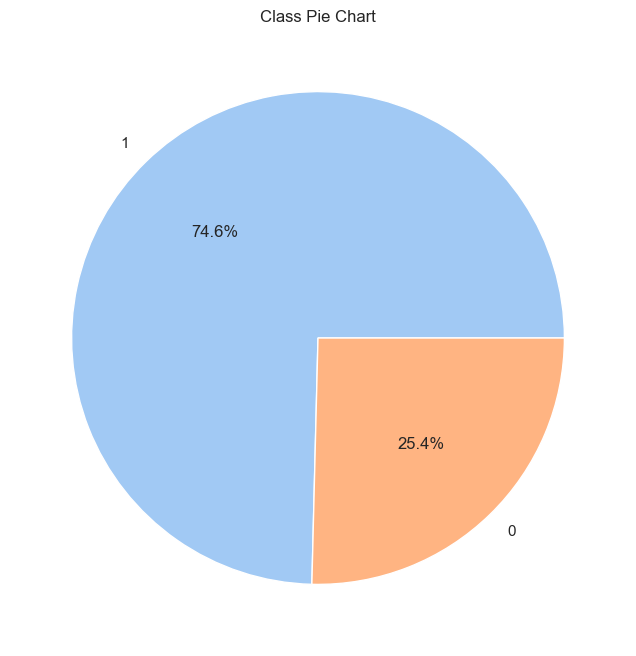

In [5]:
plt.figure(figsize=(8, 8))
sns.set_theme()  
palette = sns.color_palette("pastel")  
sns.set_palette(palette)
plt.pie(df["class"].value_counts(), labels=df["class"].unique(), autopct='%1.1f%%')
plt.title('Class Pie Chart')
plt.show()

In [6]:
#Empty lists to record the F1-Score and Accuracy values of all models;
model_acc = {}
model_f1 = {}

<a id='4'></a>
### Finding and Applying the Best Parameters for ML Models

#### 1.K-NN 

In [7]:
#K-NN Algoritması için en iyi parametreleri bulma;

knn_acc = {}
knn_f1 = {}
metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski', 'cosine']
neighbors = np.arange(1,21)


for metric in metrics:
    for neighbor in neighbors:
        y_pred,model_knn = knn_algorithm(neighbor, metric, x_train, y_train, x_test)
        knn_acc[(metric,neighbor)] = accuracy_score(y_test,y_pred)
        knn_f1[(metric,neighbor)] = f1_score(y_test,y_pred)


df_success = pd.DataFrame({
    "Metric and Neighbors": list(knn_f1.keys()),
    "f1": list(knn_f1.values()),
    "acc": list(knn_acc.values())})

df_success = df_success.sort_values(by='f1', ascending=False)

df_success.head(10)

  File "C:\Users\GulerKandeger\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\GulerKandeger\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\GulerKandeger\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\GulerKandeger\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


,Metric and Neighbors,f1,acc
20,"(manhattan, 1)",0.964912,0.947368
0,"(euclidean, 1)",0.961373,0.940789
60,"(minkowski, 1)",0.961373,0.940789
3,"(euclidean, 4)",0.960352,0.940789
63,"(minkowski, 4)",0.960352,0.940789
22,"(manhattan, 3)",0.952381,0.927632
21,"(manhattan, 2)",0.950226,0.927632
83,"(cosine, 4)",0.946903,0.921053
67,"(minkowski, 8)",0.940678,0.907895
7,"(euclidean, 8)",0.940678,0.907895


In [8]:
knn_pred, model_knn = knn_algorithm(1, 'manhattan', x_train, y_train, x_test)
calculate_accuracy(y_test, knn_pred, 'knn')

Confusion Matrix: 
 [[ 34   6]
 [  2 110]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.85      0.89        40
           1       0.95      0.98      0.96       112

    accuracy                           0.95       152
   macro avg       0.95      0.92      0.93       152
weighted avg       0.95      0.95      0.95       152



({'knn': 0.9473684210526315}, {'knn': 0.9649122807017544})

#### 2. Decision Tree 

In [9]:
#Decision Tree Algoritması için en iyi parametreleri bulma;

dt_acc = {}
dt_f1 = {}
criterions = ['gini', 'entropy', 'log_loss']
max_depths = [1,2,3,4,5,6,7,8,9,10]
min_samples_leafs = np.arange(1,11)


for criterion in criterions:
    for max_depth in max_depths:
        for min_samples_leaf in min_samples_leafs:
            y_pred, model_dt = dt_algorithm(criterion, max_depth, min_samples_leaf, x_train, y_train, x_test)
            dt_acc[(criterion,max_depth,min_samples_leaf)] = accuracy_score(y_test,y_pred)
            dt_f1[(criterion,max_depth, min_samples_leaf)] = f1_score(y_test,y_pred)


df_success = pd.DataFrame({
    "Criterion, Max Depth and Min Sample Leaf": list(dt_f1.keys()),
    "f1": list(dt_f1.values()),
    "acc": list(dt_acc.values())})

df_success = df_success.sort_values(by='f1', ascending=False)

df_success.head(10)

,"Criterion, Max Depth and Min Sample Leaf",f1,acc
240,"(log_loss, 5, 1)",0.929825,0.894737
53,"(gini, 6, 4)",0.929204,0.894737
54,"(gini, 6, 5)",0.928571,0.894737
45,"(gini, 5, 6)",0.926407,0.888158
145,"(entropy, 5, 6)",0.926407,0.888158
245,"(log_loss, 5, 6)",0.926407,0.888158
149,"(entropy, 5, 10)",0.925764,0.888158
249,"(log_loss, 5, 10)",0.925764,0.888158
247,"(log_loss, 5, 8)",0.925764,0.888158
246,"(log_loss, 5, 7)",0.925764,0.888158


In [25]:
dt_pred, model_dt = dt_algorithm('log_loss', 5, 1, x_train, y_train, x_test)
calculate_accuracy(y_test, dt_pred, 'dt')

Confusion Matrix: 
 [[ 28  12]
 [  7 105]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.70      0.75        40
           1       0.90      0.94      0.92       112

    accuracy                           0.88       152
   macro avg       0.85      0.82      0.83       152
weighted avg       0.87      0.88      0.87       152



({'knn': 0.9473684210526315,
  'dt': 0.875,
  'rf': 0.9210526315789473,
  'mlp': 0.9276315789473685,
  'svm': 0.9078947368421053,
  'gnb': 0.8026315789473685,
  'xgbc': 0.8881578947368421,
  'voting': 0.9671052631578947},
 {'knn': 0.9649122807017544,
  'dt': 0.9170305676855895,
  'rf': 0.9491525423728814,
  'mlp': 0.9527896995708155,
  'svm': 0.940677966101695,
  'gnb': 0.8571428571428571,
  'xgbc': 0.9276595744680851,
  'voting': 0.9777777777777777})

#### 3. Random Forest

In [11]:
#Decision Tree Algoritması için en iyi parametreleri bulma;

rf_acc = {}
rf_f1 = {}
criterions = ['gini', 'entropy', 'log_loss']
estimators = np.arange(100,1000,100)


for criterion in criterions:
    for estimator in estimators:
        y_pred,model_rf = rf_algorithm(estimator, criterion, x_train, y_train, x_test)
        rf_acc[(estimator,criterion)] = accuracy_score(y_test,y_pred)
        rf_f1[(estimator,criterion)] = f1_score(y_test,y_pred)


df_success = pd.DataFrame({
    "Criterion and Estimator": list(rf_f1.keys()),
    "f1": list(rf_f1.values()),
    "acc": list(rf_acc.values())})

df_success = df_success.sort_values(by='f1', ascending=False)

df_success.head(10)

,Criterion and Estimator,f1,acc
0,"(100, gini)",0.949153,0.921053
14,"(600, entropy)",0.949153,0.921053
25,"(800, log_loss)",0.949153,0.921053
24,"(700, log_loss)",0.949153,0.921053
23,"(600, log_loss)",0.949153,0.921053
22,"(500, log_loss)",0.949153,0.921053
21,"(400, log_loss)",0.949153,0.921053
20,"(300, log_loss)",0.949153,0.921053
19,"(200, log_loss)",0.949153,0.921053
18,"(100, log_loss)",0.949153,0.921053


In [12]:
rf_pred, model_rf = rf_algorithm(100, 'gini', x_train, y_train, x_test)
calculate_accuracy(y_test, rf_pred, 'rf')

Confusion Matrix: 
 [[ 28  12]
 [  0 112]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        40
           1       0.90      1.00      0.95       112

    accuracy                           0.92       152
   macro avg       0.95      0.85      0.89       152
weighted avg       0.93      0.92      0.92       152



({'knn': 0.9473684210526315,
  'dt': 0.8881578947368421,
  'rf': 0.9210526315789473},
 {'knn': 0.9649122807017544,
  'dt': 0.925764192139738,
  'rf': 0.9491525423728814})

#### 4. MLP Classifier

In [13]:
#MLP Algoritması için en iyi parametreleri bulma;

mlp_acc = {}
mlp_f1 = {}
hidden_layer_sizes = [(50,50,50), (80,80,80),(100,100,100)]
activations = ['identity', 'logistic', 'tanh','relu']
max_iters = np.arange(1000,5000,500)


for hidden_layer_size in hidden_layer_sizes:
    for activation in activations:
        for max_iter in max_iters:
            y_pred,model_mlp = mlp_algorithm(hidden_layer_size, activation, max_iter, x_train, y_train, x_test)
            mlp_acc[(hidden_layer_size,activation,max_iter)] = accuracy_score(y_test,y_pred)
            mlp_f1[(hidden_layer_size,activation,max_iter)] = f1_score(y_test,y_pred)


df_success = pd.DataFrame({
    "hidden_layer_size, activation and max_iter": list(mlp_f1.keys()),
    "f1": list(mlp_f1.values()),
    "acc": list(mlp_acc.values())})

df_success = df_success.sort_values(by='f1', ascending=False)

df_success.head(10)

,"hidden_layer_size, activation and max_iter",f1,acc
94,"((100, 100, 100), relu, 4000)",0.965217,0.947368
87,"((100, 100, 100), tanh, 4500)",0.964912,0.947368
83,"((100, 100, 100), tanh, 2500)",0.964912,0.947368
28,"((50, 50, 50), relu, 3000)",0.961373,0.940789
93,"((100, 100, 100), relu, 3500)",0.961039,0.940789
26,"((50, 50, 50), relu, 2000)",0.960699,0.940789
62,"((80, 80, 80), relu, 4000)",0.957265,0.934211
88,"((100, 100, 100), relu, 1000)",0.957265,0.934211
30,"((50, 50, 50), relu, 4000)",0.956897,0.934211
48,"((80, 80, 80), tanh, 1000)",0.956897,0.934211


In [24]:
mlp_pred, model_mlp = mlp_algorithm((100, 100, 100), 'relu', 4000, x_train, y_train, x_test)
calculate_accuracy(y_test, mlp_pred, 'mlp')

Confusion Matrix: 
 [[ 30  10]
 [  1 111]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.75      0.85        40
           1       0.92      0.99      0.95       112

    accuracy                           0.93       152
   macro avg       0.94      0.87      0.90       152
weighted avg       0.93      0.93      0.92       152



({'knn': 0.9473684210526315,
  'dt': 0.8881578947368421,
  'rf': 0.9210526315789473,
  'mlp': 0.9276315789473685,
  'svm': 0.9078947368421053,
  'gnb': 0.8026315789473685,
  'xgbc': 0.8881578947368421,
  'voting': 0.9671052631578947},
 {'knn': 0.9649122807017544,
  'dt': 0.925764192139738,
  'rf': 0.9491525423728814,
  'mlp': 0.9527896995708155,
  'svm': 0.940677966101695,
  'gnb': 0.8571428571428571,
  'xgbc': 0.9276595744680851,
  'voting': 0.9777777777777777})

#### 5. SVM

In [15]:
#SVM Algoritması için en iyi parametreleri bulma;

svm_acc = {}
svm_f1 = {}
gammas = ['scale', 'auto']
kernels = [ 'poly', 'rbf','poly']
cs = [0.1, 1, 10,100]


for gamma in gammas:
    for kernel in kernels:
        for c in cs:
            svm = SVC(kernel=kernel, C=c, gamma=gamma)
            svm.fit(x_train, y_train)
            y_pred = svm.predict(x_test)
            svm_acc[(gamma,kernel,c)] = accuracy_score(y_test,y_pred)
            svm_f1[(gamma,kernel,c)] = f1_score(y_test,y_pred)


df_success = pd.DataFrame({
    "Gamma, Kernel and C Value": list(svm_f1.keys()),
    "f1": list(svm_f1.values()),
    "acc": list(svm_acc.values())})

df_success = df_success.sort_values(by='f1', ascending=False)

df_success.head(10)

,"Gamma, Kernel and C Value",f1,acc
6,"(scale, rbf, 10)",0.940678,0.907895
7,"(scale, rbf, 100)",0.940678,0.907895
14,"(auto, rbf, 10)",0.940678,0.907895
15,"(auto, rbf, 100)",0.940678,0.907895
2,"(scale, poly, 10)",0.933333,0.894737
10,"(auto, poly, 10)",0.933333,0.894737
3,"(scale, poly, 100)",0.932773,0.894737
11,"(auto, poly, 100)",0.932773,0.894737
5,"(scale, rbf, 1)",0.921811,0.875000
13,"(auto, rbf, 1)",0.921811,0.875000


In [16]:
svm_pred, model_svm = svm_algorithm(10, 'rbf', 'scale', x_train, y_train, x_test)
calculate_accuracy(y_test, svm_pred, 'svm')

Confusion Matrix: 
 [[ 27  13]
 [  1 111]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.68      0.79        40
           1       0.90      0.99      0.94       112

    accuracy                           0.91       152
   macro avg       0.93      0.83      0.87       152
weighted avg       0.91      0.91      0.90       152



({'knn': 0.9473684210526315,
  'dt': 0.8881578947368421,
  'rf': 0.9210526315789473,
  'mlp': 0.9276315789473685,
  'svm': 0.9078947368421053},
 {'knn': 0.9649122807017544,
  'dt': 0.925764192139738,
  'rf': 0.9491525423728814,
  'mlp': 0.9527896995708155,
  'svm': 0.940677966101695})

#### 6. Gaussian Naive Bayes

In [17]:
gnb_pred, model_gnb= nb_algorithm(x_train, y_train, x_test)
calculate_accuracy(y_test, gnb_pred, 'gnb')

Confusion Matrix: 
 [[32  8]
 [22 90]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.59      0.80      0.68        40
           1       0.92      0.80      0.86       112

    accuracy                           0.80       152
   macro avg       0.76      0.80      0.77       152
weighted avg       0.83      0.80      0.81       152



({'knn': 0.9473684210526315,
  'dt': 0.8881578947368421,
  'rf': 0.9210526315789473,
  'mlp': 0.9276315789473685,
  'svm': 0.9078947368421053,
  'gnb': 0.8026315789473685},
 {'knn': 0.9649122807017544,
  'dt': 0.925764192139738,
  'rf': 0.9491525423728814,
  'mlp': 0.9527896995708155,
  'svm': 0.940677966101695,
  'gnb': 0.8571428571428571})

#### 7. XGBoost

In [18]:
xgbc_pred, model_xgbc = xgbc_algorithm(x_train, y_train, x_test)
calculate_accuracy(y_test, xgbc_pred, 'xgbc')

Confusion Matrix: 
 [[ 26  14]
 [  3 109]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.65      0.75        40
           1       0.89      0.97      0.93       112

    accuracy                           0.89       152
   macro avg       0.89      0.81      0.84       152
weighted avg       0.89      0.89      0.88       152



({'knn': 0.9473684210526315,
  'dt': 0.8881578947368421,
  'rf': 0.9210526315789473,
  'mlp': 0.9276315789473685,
  'svm': 0.9078947368421053,
  'gnb': 0.8026315789473685,
  'xgbc': 0.8881578947368421},
 {'knn': 0.9649122807017544,
  'dt': 0.925764192139738,
  'rf': 0.9491525423728814,
  'mlp': 0.9527896995708155,
  'svm': 0.940677966101695,
  'gnb': 0.8571428571428571,
  'xgbc': 0.9276595744680851})

#### 8. Ensemble Learning(Voting) 

In [19]:
#Voting Model Algoritması için en iyi parametreleri bulma;

v_acc = {}
v_f1 = {}
votings = ['soft', 'hard']



for voting in votings:
    y_pred, voting_model = voting_algorithm(x_train, y_train, x_test, voting=voting)
    v_acc[(voting)] = accuracy_score(y_test,y_pred)
    v_f1[(voting)] = f1_score(y_test,y_pred)


df_success = pd.DataFrame({
    "voting": list(v_f1.keys()),
    "f1": list(v_f1.values()),
    "acc": list(v_acc.values())})

df_success = df_success.sort_values(by='f1', ascending=False)

df_success.head()

,voting,f1,acc
1,hard,0.977778,0.967105
0,soft,0.964912,0.947368


In [20]:
voting_pred, model_voting = voting_algorithm(x_train, y_train, x_test, 'hard')
calculate_accuracy(y_test, voting_pred, 'voting')

Confusion Matrix: 
 [[ 37   3]
 [  2 110]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        40
           1       0.97      0.98      0.98       112

    accuracy                           0.97       152
   macro avg       0.96      0.95      0.96       152
weighted avg       0.97      0.97      0.97       152



({'knn': 0.9473684210526315,
  'dt': 0.8881578947368421,
  'rf': 0.9210526315789473,
  'mlp': 0.9276315789473685,
  'svm': 0.9078947368421053,
  'gnb': 0.8026315789473685,
  'xgbc': 0.8881578947368421,
  'voting': 0.9671052631578947},
 {'knn': 0.9649122807017544,
  'dt': 0.925764192139738,
  'rf': 0.9491525423728814,
  'mlp': 0.9527896995708155,
  'svm': 0.940677966101695,
  'gnb': 0.8571428571428571,
  'xgbc': 0.9276595744680851,
  'voting': 0.9777777777777777})

<a id='1'></a>
### Accuracy and F1-Score Graph of All Models

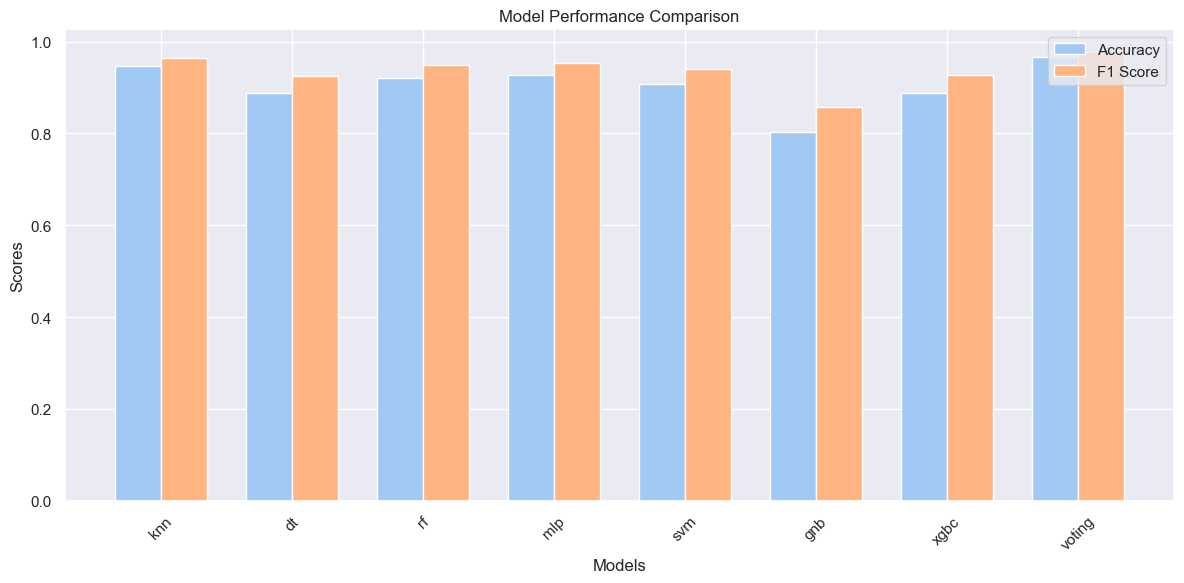

In [21]:
models = list(model_acc.keys())
accuracy_values = list(model_acc.values())
f1_values = list(model_f1.values())

x = np.arange(len(models))  # Model isimleri için x konumları

fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.35  # Çubuk genişliği

# Bar grafik
bars1 = ax.bar(x - bar_width/2, accuracy_values, bar_width, label='Accuracy')
bars2 = ax.bar(x + bar_width/2, f1_values, bar_width, label='F1 Score')

# Eksen etiketleri ve başlık
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()

In [22]:
df_acc = pd.DataFrame(list(model_acc.items()), columns=['Model', 'Accuracy'])
df_acc = df_acc.sort_values(by='Accuracy', ascending=False)
df_acc

,Model,Accuracy
7,voting,0.967105
0,knn,0.947368
3,mlp,0.927632
2,rf,0.921053
4,svm,0.907895
1,dt,0.888158
6,xgbc,0.888158
5,gnb,0.802632


In [23]:
df_f1 = pd.DataFrame(list(model_f1.items()), columns=['Model', 'F1-Score'])
df_f1 = df_f1.sort_values(by='F1-Score', ascending=False)
df_f1

,Model,F1-Score
7,voting,0.977778
0,knn,0.964912
3,mlp,0.952790
2,rf,0.949153
4,svm,0.940678
6,xgbc,0.927660
1,dt,0.925764
5,gnb,0.857143
